In [256]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [257]:
df1=pd.read_csv('autre_mois.csv')

In [258]:
df2=pd.read_csv('bureau_admin_enseignement_mois.csv')
df3=pd.read_csv('centre_commercial_mois.csv')
df4=pd.read_csv('occupation_continue_mois.csv')

In [259]:
df1['mois'] = pd.to_datetime(df1['mois'])
df2['mois'] = pd.to_datetime(df2['mois'])
df3['mois'] = pd.to_datetime(df3['mois'])
df4['mois'] = pd.to_datetime(df4['mois'])

In [260]:
df1=df1[df1['mois'].dt.year >= 2012]
df2=df2[df2['mois'].dt.year >= 2012]
df3=df3[df3['mois'].dt.year >= 2012]
df4=df4[df4['mois'].dt.year >= 2012]

In [261]:
X1_title='predictions pour la catégorie Autres par mois'
X2_title='predictions pour la catégorie bureau_admin_enseignement par mois'
X3_title='predictions pour la catégorie centre_commercial par mois'
X4_title='predictions pour la catégorie occupation_continue par mois'
titles=[X1_title,X2_title,X3_title,X4_title]

In [262]:
X1=np.array(df1['estimation_ges'].tolist())
X2=np.array(df2['estimation_ges'].tolist())
X3=np.array(df3['estimation_ges'].tolist())
X4=np.array(df4['estimation_ges'].tolist())

In [263]:
dfs=[df1,df2,df3,df4]

In [264]:
path='data/stocks/A.csv'
df_train=pd.read_csv(path)
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200


In [265]:
X=np.array(df_train['Open'].tolist())

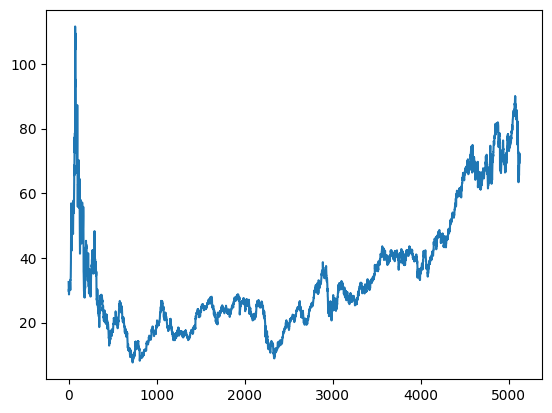

In [266]:
plt.plot(np.arange(len(X)),X)

In [267]:
def split(X,n_seq=5):
    X_train=[X[i:i+n_seq] for i in range (len(X)-n_seq)]
    y_train=[X[i+n_seq] for i in range(len(X)-n_seq)]
    return np.array(X_train),np.array(y_train) 

In [268]:
def preprocess(X,n_seq=5):
    X_train,y_train=split(X,n_seq=n_seq)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  
    return X_train,y_train


In [269]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import GlorotUniform, HeNormal
from tensorflow.keras.layers import LayerNormalization


checkpoint = ModelCheckpoint("best_model.weights.h5", 
                             monitor="val_loss", 
                             save_best_only=True, 
                             save_weights_only=True,  

                             mode="min", 
                             verbose=1)

In [270]:
X.shape

(5124,)

In [271]:
n_seq=60

X_train,y_train=preprocess(X,n_seq=n_seq)
n=int(0.8*len(X))
X_train,X_val=X_train[:n],X_train[n:]
y_train,y_val=y_train[:n],y_train[n:]
model = Sequential([
LSTM(32, activation='relu', input_shape=(X_train.shape[1], 1),kernel_initializer=HeNormal(),return_sequences=False),
# LayerNormalization(),
# LSTM(16, activation='relu', input_shape=(X_train.shape[1], 1),kernel_initializer=HeNormal(),return_sequences=False),

Dense(1)  # Une seule sortie
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, validation_data=(X_val, y_val), 
          epochs=15, batch_size=8, verbose=1, 
          callbacks=[checkpoint])

# Charger les meilleurs poids après l'entraînement
model.load_weights("best_model.weights.h5")


Epoch 1/15


c:\Users\marie\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


510/513 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 562574.5000
Epoch 1: val_loss improved from inf to 27510.34961, saving model to best_model.weights.h5
513/513 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 560190.8125 - val_loss: 27510.3496
Epoch 2/15
509/513 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2180.5615
Epoch 2: val_loss improved from 27510.34961 to 50.11264, saving model to best_model.weights.h5
513/513 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 2170.2861 - val_loss: 50.1126
Epoch 3/15
512/513 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 605.6527
Epoch 3: val_loss did not improve from 50.11264
513/513 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 606.1440 - val_loss: 323.2399
Epoch 4/15
511/513 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 523.1378
Epoch 4: val_loss did not improve from 50.11264
513/513 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 523.3038 - val_loss: 78.1691
Epoch 5/15
513/513 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 592.1373
Epoch 5: val_loss improved from 50.11264 to 37.22070

In [58]:
def predict(X,i,n_seq=n_seq):
    X_topredict,y=preprocess(X,n_seq=n_seq)
    prediction = model.predict(X_topredict)
    idx=np.arange(len(y))
    plt.plot(idx,y)
    plt.plot(idx,prediction)
    mean_squared_error(y,prediction)
    plt.legend(['true','predicted'])
    plt.title(titles[i-1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step


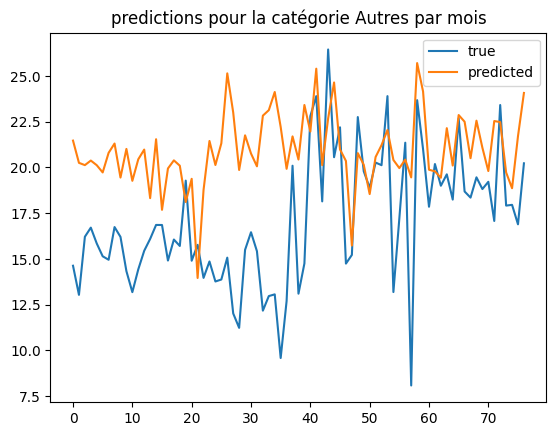

In [59]:
predict(X1,1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


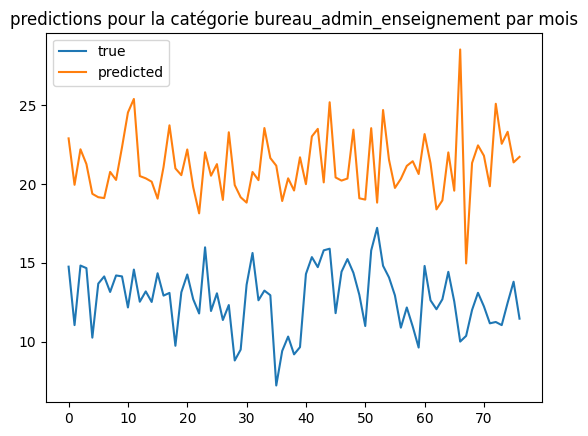

In [60]:
predict(X2,2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


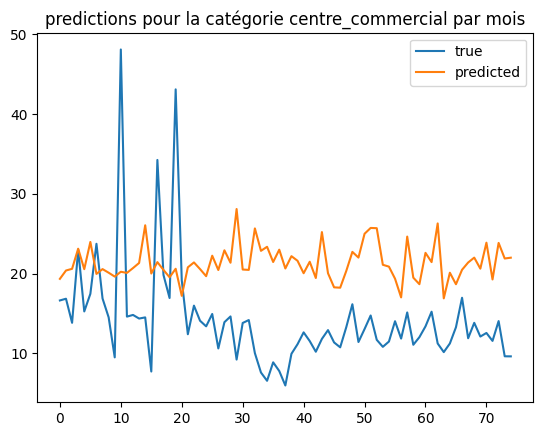

In [61]:
predict(X3,3)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


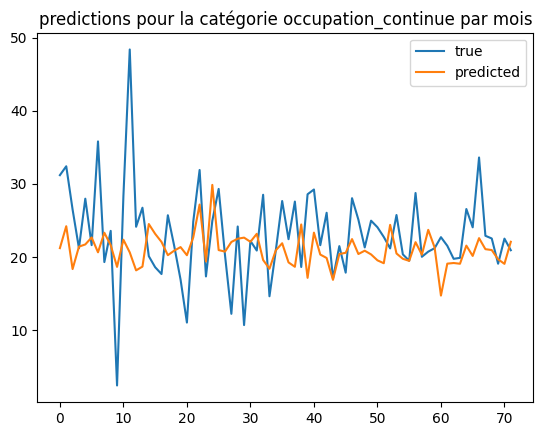

In [62]:
predict(X4,4)

### let's try this architecture for predicting the future

In [272]:
def recursive_forecast(X,i,n_seq=n_seq ,future_days=30):
    predicted_values = []
    
    last_sequence=X[0:n_seq].reshape(1,n_seq,1)

    for _ in range(future_days):
        next_pred = model.predict(last_sequence,verbose=0)[0][0]

        predicted_values.append(next_pred)

        last_sequence = np.append(last_sequence[:, 1:, :], [[[next_pred]]], axis=1)

    future_preds=np.array(predicted_values).reshape(-1, 1)
    future_preds=future_preds.reshape(len(future_preds))
    mse_loss=np.mean((X[n_seq:] - future_preds) ** 2)
    predicted=np.concatenate([X[:n_seq],future_preds])

    plt.plot(dfs[i-1]['mois'],predicted,color='red')

    plt.plot(dfs[i-1]['mois'],X)
    plt.xlabel('date')
    plt.ylabel('ges')
    plt.legend(['predicted','True'])
    plt.title(f'prediction pour categorie {titles[i-1]} avec mse = {mse_loss :.2f}')


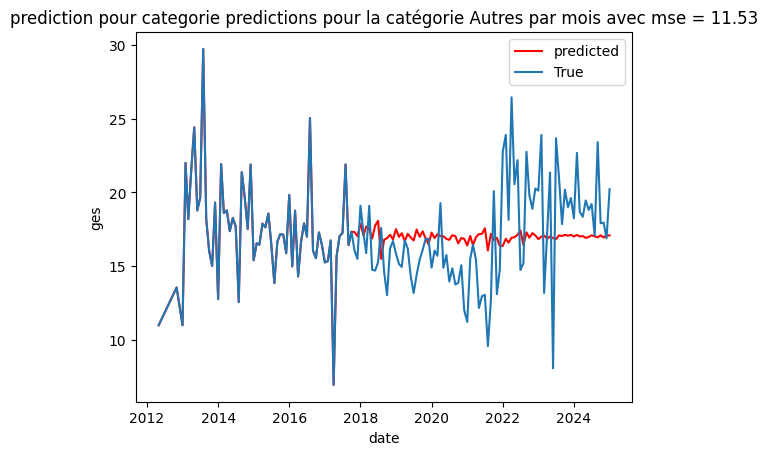

In [273]:
future_predictions = recursive_forecast( X1,1, future_days=len(X1)-n_seq)

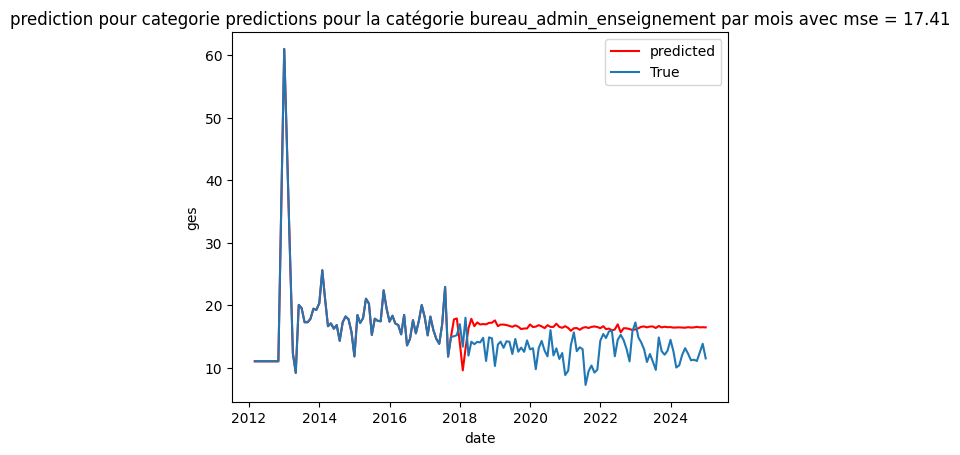

In [274]:
future_predictions = recursive_forecast( X2,2, future_days=len(X2)-n_seq)


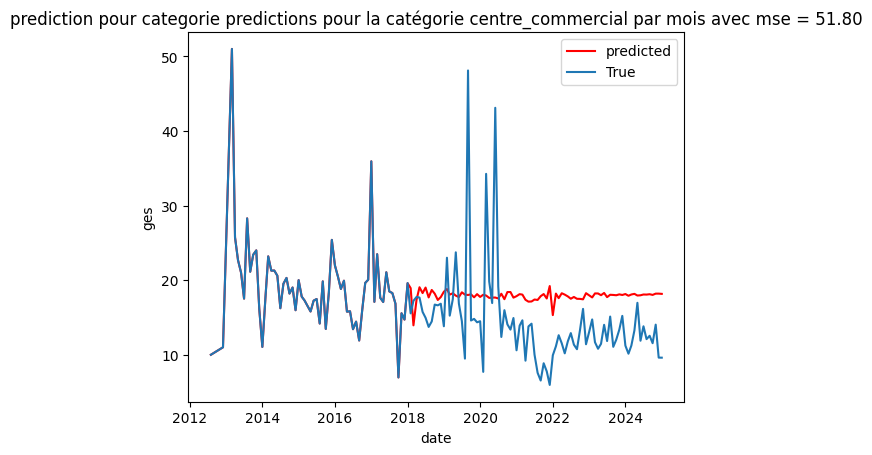

In [275]:
future_predictions = recursive_forecast( X3,3, future_days=len(X3)-n_seq)


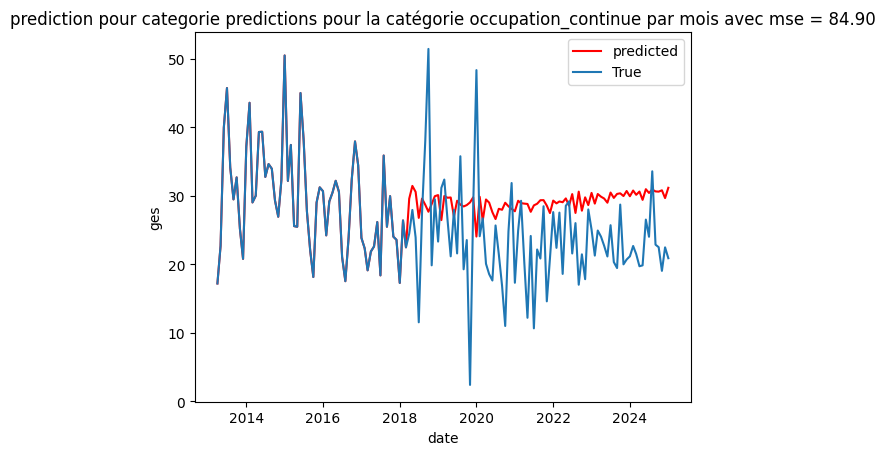

In [276]:
future_predictions = recursive_forecast( X4,4, future_days=len(X4)-n_seq)

In [89]:
def split_many_to_many(X, n_seq=5, out_seq=30):
    X_data, y_data = [], []
    # On s'assure qu'il y a suffisamment de points pour une séquence d'entrée et 30 valeurs de sortie
    for i in range(len(X) - n_seq - out_seq + 1):
        X_data.append(X[i:i+n_seq])
        y_data.append(X[i+n_seq:i+n_seq+out_seq])
    return np.array(X_data), np.array(y_data)


In [112]:
# Exemple d'utilisation :
X_data, y_data = split_many_to_many(X, n_seq=60, out_seq=20)
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], 1))
y_data = y_data.reshape((y_data.shape[0], y_data.shape[1], 1))  # optionnel, si vous préférez des sorties 3D


In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

n_seq = 80     # longueur de la séquence d'entrée
out_seq = 20  # longueur de la séquence de sortie

model1 = Sequential([
    # Encodeur : LSTM avec return_sequences=True peut être utile pour plus de profondeur
    LSTM(64, activation='relu', input_shape=(n_seq, 1), return_sequences=True),
    LSTM(8, activation='relu', return_sequences=False),
    
    # Répéter le vecteur de contexte pour former une séquence de longueur out_seq
    RepeatVector(out_seq),
    
    # Décodeur : on reconstruit une séquence avec return_sequences=True
    LSTM(64, activation='relu', return_sequences=True),
    
    # Appliquer une couche Dense à chaque pas temporel
    TimeDistributed(Dense(1))
])

# Compilation du modèle
model1.compile(optimizer='adam', loss='mse')

# Afficher le résumé du modèle
model1.summary()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                  │ (None, 80, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 8)              │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_7 (RepeatVector)  │ (None, 20, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 20, 64)         │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 20, 1)          │            65 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,985 (148.38 KB)

 Trainable params: 37,985 (148.38 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
n = int(0.85 * len(X_data))
X_train, X_val = X_data[:n], X_data[n:]
y_train, y_val = y_data[:n], y_data[n:]

model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=16, verbose=1)


Epoch 1/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 670.4055 - val_loss: 490.2538
Epoch 2/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 33.2222 - val_loss: 245.8466
Epoch 3/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 14.9349 - val_loss: 250.9672
Epoch 4/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 10.5259 - val_loss: 633.4158
Epoch 5/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 12.5898 - val_loss: 85.1830
Epoch 6/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 9.7866 - val_loss: 84.1937
Epoch 7/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 8.9181 - val_loss: 161.7964
Epoch 8/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 9.3666 - val_loss: 224.9734
Epoch 9/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 9.1905 - val_loss: 177.7569
Epoch 10/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 8.9441 - val_loss: 178.2812
Epoch 11/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 9.0654 - val_loss: 76.0029
Epoch 12/20
268

In [119]:
X_data, y_data = split_many_to_many(X2, n_seq=60, out_seq=20)
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], 1))
y_data = y_data.reshape((y_data.shape[0], y_data.shape[1], 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


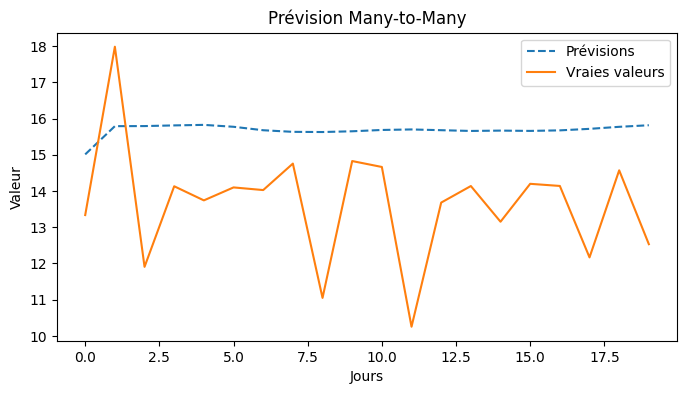

In [120]:
def many_to_many_forecast(X, y, n):
    """
    X : séquences d'entrée prétraitées de forme (samples, n_seq, features)
    y : séquences cibles prétraitées de forme (samples, out_seq) ou (samples, out_seq, features)
    n : index de la séquence à prédire
    """
    # Extraire la séquence d'entrée à l'indice n
    input_seq = X[n].reshape(1, X.shape[1], X.shape[2])
    
    # Prédiction : le modèle renvoie directement une séquence de longueur out_seq
    pred_seq = model1.predict(input_seq)[0]
    # Reformater en 1D pour le plot
    pred_seq = pred_seq.reshape(-1)
    
    # Extraire la séquence cible vraie correspondante
    true_seq = y[n].reshape(-1)
    
    # Création de l'indice pour l'axe x
    idx = np.arange(len(pred_seq))
    
    # Tracé des prévisions et des vraies valeurs
    plt.figure(figsize=(8,4))
    plt.plot(idx, pred_seq, label="Prévisions", linestyle="dashed")
    plt.plot(idx, true_seq, label="Vraies valeurs")
    plt.xlabel("Jours")
    plt.ylabel("Valeur")
    plt.title("Prévision Many-to-Many")
    plt.legend()
    plt.show()
    
    return pred_seq


pred_seq = many_to_many_forecast(X_data, y_data, n=10)


In [ ]:
X_data.shape

(85, 60, 1)